#  **Water Quality Potability Prediction**

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

In [12]:
import numpy as np
import pandas as pd 

### Read dataset

In [13]:
df = pd.read_csv('../data/water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Data Explanation
* ph: pH of 1. water (0 to 14).
* Hardness: Capacity of water to precipitate soap in mg/L.
* Solids: Total dissolved solids in ppm.
* Chloramines: Amount of Chloramines in ppm.
* Sulfate: Amount of Sulfates dissolved in mg/L.
* Conductivity: Electrical conductivity of water in μS/cm.
* Organic_carbon: Amount of organic carbon in ppm.
* Trihalomethanes: Amount of Trihalomethanes in μg/L.
* Turbidity: Measure of light emiting property of water in NTU.
* Potability: Indicates if water is safe for human consumption. Potable - 1 and Not potable - 0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


# Exploratory Data Analysis

### Check the imbalance dataset

ValueError: number of labels (1) does not match number of bars (10).

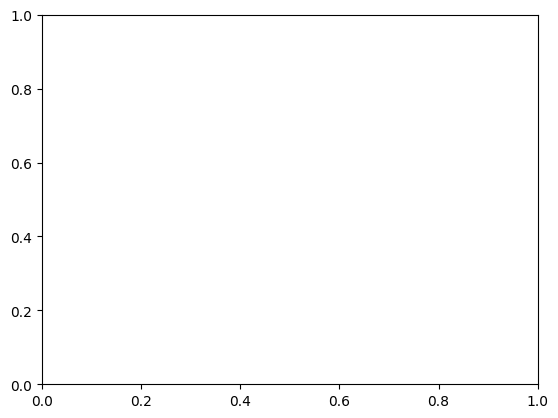

In [15]:
import matplotlib.pyplot as plt

labels = []
for i, df_visualize in enumerate(df.groupby(["Potability"])):
    labels.append(df_visualize[0])
    plt.bar(i, df_visualize[1].count(), label=df_visualize[0])
plt.xticks(range(len(labels)), labels)
plt.legend()
plt.title('Potability')
plt.show()

In [ ]:
data = df.groupby("Potability")["ph"].sum()
pie, ax = plt.subplots(figsize=[10,6])
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Potability", fontsize=14)

### Check the histogram of the data

In [ ]:
df.hist(figsize=(15,15))
plt.show()

### Check the correlation of each column

In [ ]:
df.corr()

In [ ]:
import seaborn as sb


plt.figure(figsize=(12,10))
sb.heatmap(df.corr(), annot=True)

In [ ]:
df[df.columns[1:]].corr()['Potability'][:].sort_values(ascending=False)

### Check the null value of the data

In [ ]:
df.isnull().sum()

### Fill the null value with the **median** value

In [16]:
df['ph'].fillna(value=df['ph'].median(),inplace=True)
df['Sulfate'].fillna(value=df['Sulfate'].median(),inplace=True)
df['Trihalomethanes'].fillna(value=df['Trihalomethanes'].median(),inplace=True)

In [17]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

### Normalize Data using **MinMaxScaler**

In [18]:
x = df.drop(['Potability'], axis='columns')
y = df.Potability

In [19]:
from sklearn.preprocessing import MinMaxScaler


features_scaler = MinMaxScaler()
features = features_scaler.fit_transform(x)
features

array([[0.50262515, 0.57113901, 0.33609646, ..., 0.31340165, 0.69975313,
        0.28609102],
       [0.26543429, 0.29740043, 0.30061142, ..., 0.49731851, 0.4509993 ,
        0.57679264],
       [0.57850887, 0.64131081, 0.32161885, ..., 0.56201674, 0.5328657 ,
        0.30363656],
       ...,
       [0.67282217, 0.46548556, 0.53910122, ..., 0.33866167, 0.56065454,
        0.34956996],
       [0.36619735, 0.66440723, 0.19148981, ..., 0.34363779, 0.62265916,
        0.61611996],
       [0.56247653, 0.53563505, 0.28048408, ..., 0.5341137 , 0.63247754,
        0.16244074]])

### Cross Validation and Hyperparameter Tuning

In [20]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20,30,50],
            'kernel': ['rbf','linear','poly']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [10,50,100]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'KNN' : {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3,7,11,13]
        }
    }
    
}

In [21]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(features, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_score

,model,best_score,best_params
0,svm,0.621794,"{'C': 50, 'kernel': 'rbf'}"
1,random_forest,0.629738,{'n_estimators': 100}
2,logistic_regression,0.610501,{'C': 1}
3,KNN,0.613859,{'n_neighbors': 13}


In [22]:
sb.barplot(x="model", y="best_score", data=df_score)
plt.ylim(0, 1)

NameError: name 'sb' is not defined

### Find the best alghoirtm and the best parameter

In [23]:
row_score_max = df_score['best_score'].argmax()
df_score.loc[[row_score_max]]

,model,best_score,best_params
1,random_forest,0.629738,{'n_estimators': 100}


### Display the result of the best alghoritm

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, y, test_size=0.25, random_state=101)

In [25]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.6800976800976801

### Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix


y_predicted = model.predict(x_test)
cm = confusion_matrix(y_test,y_predicted)
plt.figure(figsize = (10,7))
sb.heatmap(cm, annot=True, fmt=".1f")
plt.xlabel('Predicted')

NameError: name 'sb' is not defined

<Figure size 1000x700 with 0 Axes>

### Classification Report

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.69      0.89      0.77       506
           1       0.66      0.34      0.45       313

    accuracy                           0.68       819
   macro avg       0.67      0.62      0.61       819
weighted avg       0.67      0.68      0.65       819



# Try handle imbalance dataset to get better result

In [28]:
y.value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

### Handle Imbalance using **SMOTE**

In [29]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(features, y)

y_sm.value_counts()

Potability
0    1998
1    1998
Name: count, dtype: int64

### Cross validation and hyperparemeter using a new dataset

In [30]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_sm, y_sm)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_score_smote = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_score_smote

,model,best_score,best_params
0,svm,0.539553,"{'C': 50, 'kernel': 'rbf'}"
1,random_forest,0.692707,{'n_estimators': 50}
2,logistic_regression,0.511264,{'C': 5}
3,KNN,0.678186,{'n_neighbors': 3}


In [ ]:
sb.barplot(x="model", y="best_score", data=df_score_smote)
plt.ylim(0, 1)

In [31]:
row_score_max_smote = df_score_smote['best_score'].argmax()
df_score_smote.loc[[row_score_max_smote]]

,model,best_score,best_params
1,random_forest,0.692707,{'n_estimators': 50}


### Display the result again to compare before and after handle imbalance dataset

In [32]:
x_train_smote, x_test_smote, y_train_smote, y_test_smote = train_test_split(x_sm, y_sm, test_size=0.25, random_state=101)

In [33]:
model_smote = RandomForestClassifier(n_estimators=100)
model_smote.fit(x_train_smote,y_train_smote)
model_smote.score(x_test_smote,y_test_smote)

0.7457457457457457

In [34]:
y_predicted_smote = model_smote.predict(x_test_smote)
cm = confusion_matrix(y_test_smote,y_predicted_smote)
plt.figure(figsize = (10,7))
sb.heatmap(cm, annot=True, fmt=".1f")
plt.xlabel('Predicted')

NameError: name 'sb' is not defined

<Figure size 1000x700 with 0 Axes>

In [ ]:
print(classification_report(y_test_smote,y_predicted_smote))

# **Conclusion**
## With handle imbalance dataset with SMOTE highly affect the F1-score of the "1" Potabilty from **0.46** to **0.74**